# Monopoly Game

I am trying to identify the patterns in the monopoly game, such as the percentages of stopping in each square, with that is possible to create an strategy based on dividend yield of each property. The same results can be achieved by Markov Chains

# 1.0 Import Libraries 

In [43]:
import random # the library to run the dices
import matplotlib.pyplot as plt
import pandas as pd

# 2.0 Setting Parameters

In [29]:

squares=[0]*40 # because I have 40 squares
streets_lists=["Start","Old Kent Road","Community Chest","White Chapel Road","Income Taxes","King´s Cross Station","The Angel Islington","Chance","Euston Road","Pentoville Road","Jail","Pall Mall","Electric Company","WhiteHall","Northumbnd Avenue","MarylBone Station","Bow Street","Community Chest","Marlborough Street","Vine Street","Free Parking","Strand","Chance","Fleet Street","Trafalgar Square","Fenchurch St Station","Leicester Square","Coventry Street","Water Works","Picadilly","Go to Jail","Regent Street","Oxford Street","Community Chest","Bond Street","Liverpool St. Station","Chance","Park Lane","Super Tax","Mayfair"]

# 3.0 Set the Loop

In [30]:
position=0 # you start at the start point
jail=False # in the initial condition you dont start at the jail
for c in range(1000000):# 1 million visits
    for a in range(100): # the game have 100 plays
        if jail==False:
            dice1=random.randint(1,6)
            dice2=random.randint(1,6)
            soma=dice1+dice2
            position=position+soma
        if position ==30: # jail
            position=10
            jail=True
        if jail ==True:
            for b in range(3):
                dice1=random.randint(1,6)
                dice2=random.randint(1,6)
                soma=dice1+dice2
                if dice1==dice2:
                    jail=False
                    position=position+soma
        if position>=40:
            position=position-40
        squares[position]+=1

# 4.0 Analitical Results

In [33]:
for x in range(len(streets_lists)):
    if x!=30: # i dont want to print the go to jail
        print(f"{streets_lists[x]}: {squares[x]/sum(squares)*100:.2f}%")

Start: 2.28%
Old Kent Road: 2.30%
Community Chest: 2.32%
White Chapel Road: 2.35%
Income Taxes: 2.30%
King´s Cross Station: 2.29%
The Angel Islington: 2.28%
Chance: 2.29%
Euston Road: 2.29%
Pentoville Road: 2.30%
Jail: 5.97%
Pall Mall: 2.30%
Electric Company: 2.66%
WhiteHall: 2.30%
Northumbnd Avenue: 2.69%
MarylBone Station: 2.32%
Bow Street: 2.73%
Community Chest: 2.36%
Marlborough Street: 2.80%
Vine Street: 2.43%
Free Parking: 2.87%
Strand: 2.49%
Chance: 2.95%
Fleet Street: 2.55%
Trafalgar Square: 2.65%
Fenchurch St Station: 2.60%
Leicester Square: 2.68%
Coventry Street: 2.64%
Water Works: 2.71%
Picadilly: 2.67%
Regent Street: 2.66%
Oxford Street: 2.62%
Community Chest: 2.51%
Bond Street: 2.46%
Liverpool St. Station: 2.36%
Chance: 2.29%
Park Lane: 2.19%
Super Tax: 2.24%
Mayfair: 2.27%


# 5.0 Dataframe with percentages

In [49]:
percentages=[]
for g in range(len(squares)):
    percentages.append(squares[g]/sum(squares))
df=pd.DataFrame()
df["Streets"]=streets_lists
df["Percentages"]=percentages
df=df[df.index!=30]
df

,Streets,Percentages
0,Start,0.022821
1,Old Kent Road,0.022994
2,Community Chest,0.023208
3,White Chapel Road,0.023465
4,Income Taxes,0.023048
5,King´s Cross Station,0.022905
6,The Angel Islington,0.022834
7,Chance,0.022859
8,Euston Road,0.022881
9,Pentoville Road,0.022976


# 6.0 Plot the Results

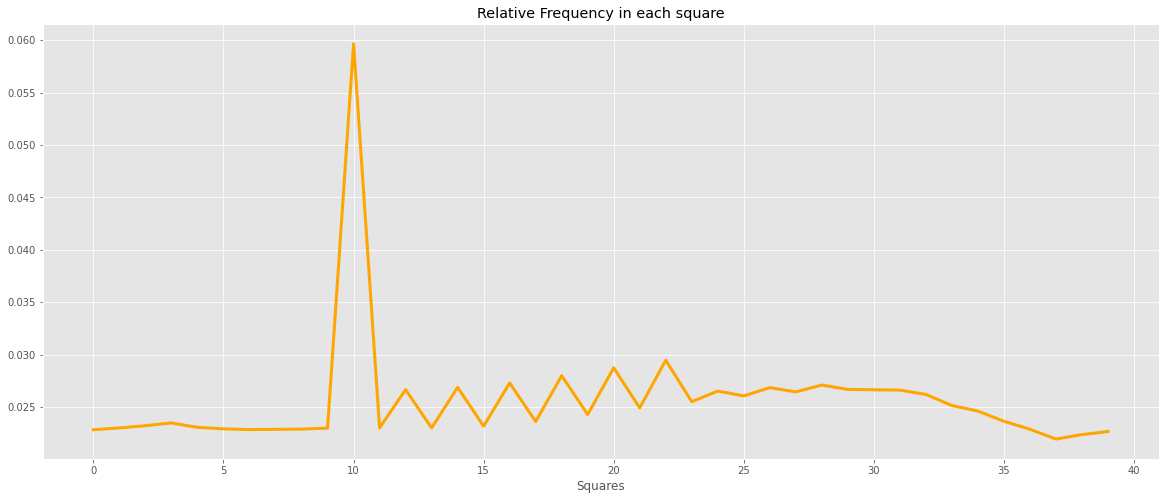

In [58]:
plt.figure(figsize=(20,8))
plt.style.use("ggplot")
plt.title("Relative Frequency in each square")
plt.xlabel("Squares")
plt.plot(df["Percentages"],color="orange",linewidth=3)